# Predicting Vehicle CO₂ Emissions
This notebook CO₂ emissions multiple‑linear‑regression project with:
* 🔄 Better data preprocessing (scaling, encoding, train/test split) 
* 📈 Additional models (Polynomial, Ridge, Lasso, , RandomForest)
* 🪄 Hyperparameter tuning & cross‑validation for higher accuracy
* 🔬 Feature importance & interpretability

In [30]:
# Predicting Vehicle CO₂ Emissions – Intermediate Regression Project
# Author: <Your Name Here>
# ---------------------------------------------------------------
# This script implements a regression workflow to predict vehicle
# CO₂ emissions using the public Canadian Fuel Consumption dataset.
# The steps include:
#   1. Importing libraries
#   2. Loading and inspecting the dataset
#   3. Exploratory Data Analysis (EDA)
#   4. Feature selection & preprocessing pipeline
#   5. Training multiple regression models
#   6. Comparing model performance
#   7. Visualising predictions & feature importance
# ---------------------------------------------------------------

# === 1. Import Required Libraries ===
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the Dataset
* 2.1 Dataset snapshot & basic info


In [42]:


import os
if not os.path.exists('FuelConsumption.csv'):
    os.system('wget -q -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')

# Load into a DataFrame
df = pd.read_csv('FuelConsumption.csv')
print(f"Dataset loaded with {df.shape[0]} rows & {df.shape[1]} columns.\n")
df.head()



Dataset loaded with 1067 rows & 13 columns.



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# 2.1 Dataset Snapshot & Basic Info 

In [44]:

print("\nDataFrame info:\n")
df.info()
print("\nSummary statistics:\n")
df.describe().T


DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usa

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


# 3. Exploratory Data Analysis (EDA)
* 3.1 Select relevant features & target
* 3.2 Train‑test split

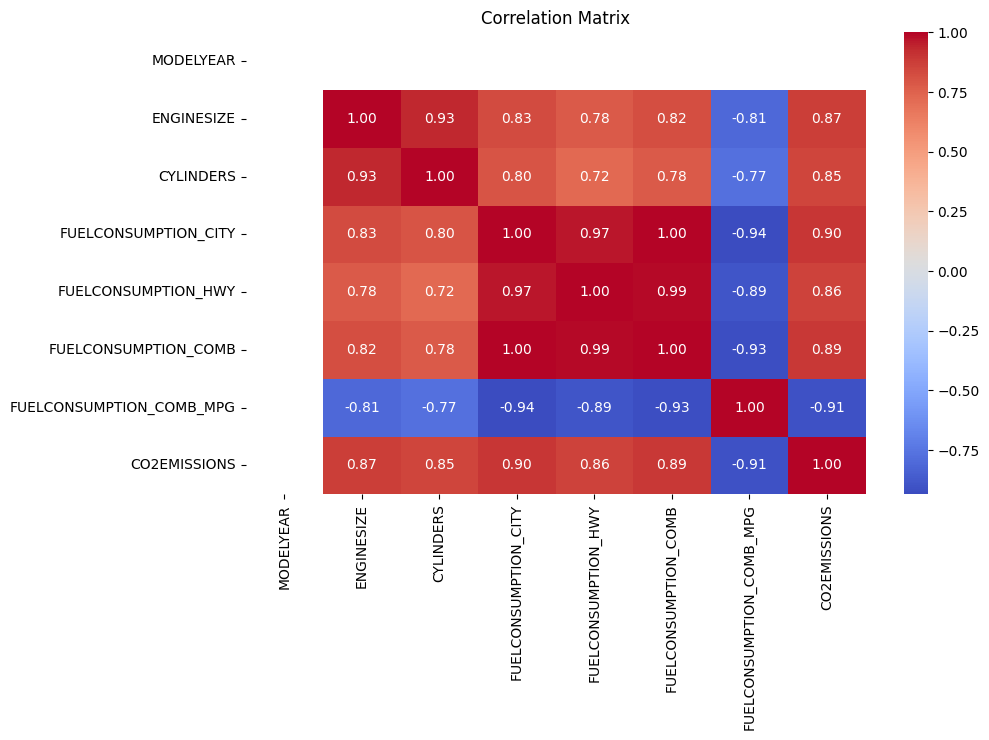


Training set shape: (853, 6)  Test set shape: (214, 6)



In [32]:
# === 3. Exploratory Data Analysis (EDA) ===
# Filter numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Then compute correlation on those
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# === 3.1 Select Relevant Features & Target ===
TARGET = 'CO2EMISSIONS'
num_features = [
    'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
    'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'
]
cat_features = ['FUELTYPE']

X = df[num_features + cat_features]
y = df[TARGET]

# === 3.2 Train‑Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['FUELTYPE']
)
print(f"\nTraining set shape: {X_train.shape}  Test set shape: {X_test.shape}\n")

# 4. Preprocessing pipeline

In [33]:

# === 4. Preprocessing Pipeline ===
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# === 4.1 Helper Function: Evaluate Model ===
results = []

def evaluate(model, name):
    """Fit the model, predict on test set, and compute R² and RMSE."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2  = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name:<20} | R²: {r2:.6f} | RMSE: {rmse:.1f}")
    results.append({'Model': name, 'R2': r2, 'RMSE': rmse, 'Predictions': y_pred})

# 5. Baseline: 
* Ordinary Least Squares (OLS) Linear Regression
* Polynomial Regression (degree 2)
* Ridge
* Lasso
  

In [34]:
#  Linear Regression 
ols = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])
evaluate(ols, 'Linear Regression')

# 6. Polynomial Regression (Degree 2) 
poly_model = Pipeline([
    ('prep', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])
evaluate(poly_model, 'Polynomial (deg 2)')

#  7. Regularized Linear Models 
ridge = Pipeline([
    ('prep', preprocessor),
    ('model', Ridge(alpha=1.0))
])
evaluate(ridge, 'Ridge')

lasso = Pipeline([
    ('prep', preprocessor),
    ('model', Lasso(alpha=1.0, max_iter=5000))
])
evaluate(lasso, 'Lasso')



Linear Regression    | R²: 0.991289 | RMSE: 6.6
Polynomial (deg 2)   | R²: 0.999982 | RMSE: 0.3
Ridge                | R²: 0.990960 | RMSE: 6.7
Lasso                | R²: 0.976578 | RMSE: 10.8


# 8. Ensemble Model: Random Forest

In [35]:
rf = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
evaluate(rf, 'RandomForest')

RandomForest         | R²: 0.993991 | RMSE: 5.5


# 9. Compare & visualise model performance


Model comparison:
                 Model        R2       RMSE
0  Polynomial (deg 2)  0.999982   0.297066
1        RandomForest  0.993991   5.472203
2   Linear Regression  0.991289   6.588532
3               Ridge  0.990960   6.711826
4               Lasso  0.976578  10.803437


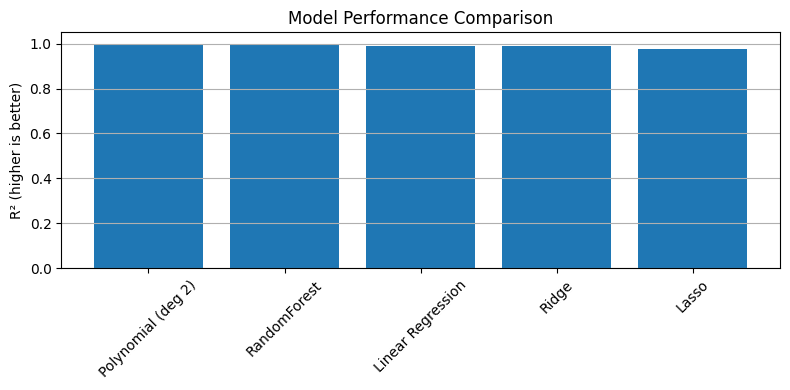

In [36]:

res_df = pd.DataFrame([{k: v for k, v in d.items() if k != 'Predictions'} for d in results])
res_df = res_df.sort_values('R2', ascending=False).reset_index(drop=True)
print("\nModel comparison:\n", res_df)

plt.figure(figsize=(8, 4))
plt.bar(res_df['Model'], res_df['R2'])
plt.ylabel('R² (higher is better)')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 10. Detailed diagnostics for the best model 

In [37]:

import numpy as np
from sklearn.metrics import mean_squared_error

# 1) Find the name of the top‑scoring model
best_name = res_df.iloc[0]['Model']

# 2) Grab its predictions
best_entry = next(d for d in results if d['Model'] == best_name)
y_pred     = best_entry['Predictions']

# 3) Compute  statistics
#    • Variance of the observed test targets
variance_y = np.var(y_test, ddof=0)              # population variance
#    • Mean‑squared‑error (already known, but recomputed for clarity)
mse        = mean_squared_error(y_test, y_pred)
#    • Residual sum‑of‑squares (RSS)
rss        = mse * len(y_test)                   # because RSS = MSE · n
r2 = r2_score(y_test, y_pred)
# # 4) Get coefficients if the algorithm has them
# #    (tree/forest models won’t)
# try:
#     # The fitted pipeline lives in memory because evaluate() called .fit()
#     fitted_pipe = {
#         'Linear Regression':  ols,
#         'Polynomial (deg 2)': poly_model,
#         'Ridge':              ridge,
#         'Lasso':              lasso,
#         'RandomForest':       rf
#     }[best_name]
#     coefs = fitted_pipe.named_steps['model'].coef_
# except AttributeError:
#     coefs = 'Not applicable (model is tree‑based)'

# 5) print
print(f"\n=== Diagnostics for BEST model: {best_name} ===")
print(f"R² score (variance explained): {r2:.6f}")
print(f"Variance of y_test : {variance_y:,.3f}")
print(f"Mean Squared Error : {mse:,.3f}")
print(f"Residual Sum Sqrs  : {rss:,.3f}")
# print(f"Coefficients       :\n{coefs}")



=== Diagnostics for BEST model: Polynomial (deg 2) ===
R² score (variance explained): 0.999982
Variance of y_test : 4,983.144
Mean Squared Error : 0.088
Residual Sum Sqrs  : 18.885


#  11. Scatter Plot of Predictions 

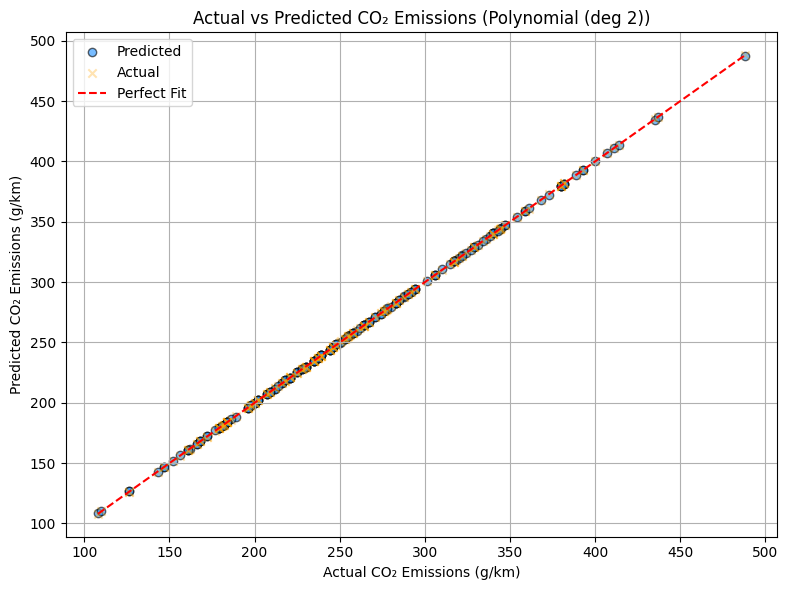

In [38]:

best_result = max(results, key=lambda x: x['R2'])
best_model_name = best_result['Model']
y_pred = best_result['Predictions']

plt.figure(figsize=(8, 6))

# Predicted values
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted', color='dodgerblue', edgecolor='k')

# Actual values (plot y_test vs y_test as a reference)
plt.scatter(y_test, y_test, alpha=0.3, label='Actual', color='orange', marker='x')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')

plt.xlabel('Actual CO₂ Emissions (g/km)')
plt.ylabel('Predicted CO₂ Emissions (g/km)')
plt.title(f'Actual vs Predicted CO₂ Emissions ({best_model_name})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  11. Feature Importance (Random Forest) 

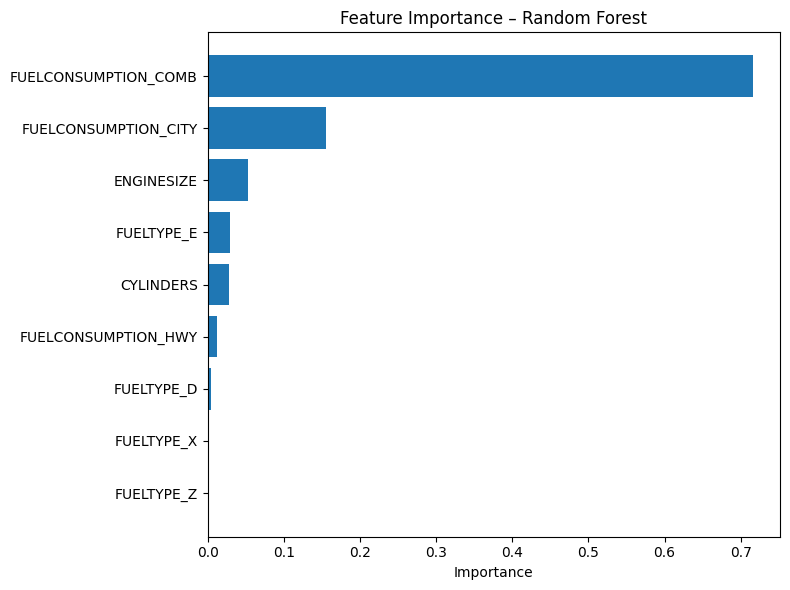

In [39]:

# Re‑fit RandomForest to access feature importances
rf.fit(X_train, y_train)

# Retrieve feature names after One‑Hot Encoding
ohe = rf.named_steps['prep'].named_transformers_['cat'].named_steps['ohe']
encoded_cat_names = ohe.get_feature_names_out(cat_features)
feature_names = num_features + list(encoded_cat_names)

importances = rf.named_steps['model'].feature_importances_
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance – Random Forest')
plt.tight_layout()
plt.show()